In [119]:
#ignore warnings
import warnings
warnings.filterwarnings('ignore')


In [120]:
#import packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import linear_model, metrics
from sklearn.feature_selection import RFE,SelectFromModel
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
from statsmodels.stats.outliers_influence import variance_inflation_factor

## Data Reading & Understanding

In [121]:
df=pd.read_csv('train.csv')
pd.set_option('display.max_columns',None)

In [122]:
df.head(10)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
5,6,50,RL,85.0,14115,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Mitchel,Norm,Norm,1Fam,1.5Fin,5,5,1993,1995,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,Wood,Gd,TA,No,GLQ,732,Unf,0,64,796,GasA,Ex,Y,SBrkr,796,566,0,1362,1,0,1,1,1,1,TA,5,Typ,0,NaN,Attchd,1993.0,Unf,2,480,TA,TA,Y,40,30,0,320,0,0,NaN,MnPrv,Shed,700,10,2009,WD,Normal,143000
6,7,20,RL,75.0,10084,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2004,2005,Gable,CompShg,VinylSd,VinylSd,Stone,186.0,Gd,TA,PConc,Ex,TA,Av,GLQ,1369,Unf,0,317,1686,GasA,Ex,Y,SBrkr,1694,0,0,1694,1,0,2,0,3,1,Gd,7,Typ,1,Gd,Attchd,2004.0,RFn,2,636,TA,TA,Y,255,57,0,0,0,0,NaN,NaN,NaN,0,8,2007,WD,Normal,307000
7,8,60,RL,NaN,10382,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,NWAmes,PosN,Norm,1Fam,2Story,7,6,1973,1973,Gable,CompShg,HdBoard,HdBoard,Stone,240.0,TA,TA,CBlock,Gd,TA,Mn,ALQ,859,BLQ,32,216,1107,GasA,Ex,Y,SBrkr,1107,983,0,2090,1,0,2,1,3,1,TA,7,Typ,2,TA,Attchd,1973.0,RFn,2,484,TA,TA,Y,235,204,228,0,0,0,NaN,NaN,Shed,350,11,2009,WD,Normal,200000
8,9,50,RM,51.0,6120,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Artery,Norm,1Fam,1.5Fin,7,5,1931,1950,Gable,CompShg,BrkFace,Wd Shng,None,0.0,TA,TA,BrkTil,TA,TA,No,Unf,0,Unf,0,952,952,GasA,Gd,Y,FuseF,1022,752,0,1774,0,0,2,0,2,2,TA,8,Min1,2,TA,Detchd,1931.0,Unf,2,468,Fa,TA,Y,90,0,205,0,0,0,NaN,NaN,NaN,0,4,2008,WD,Abnorml,129900
9,10,190,RL,50.0,7420,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,BrkSide,Artery,Artery,2fmCon,1.5Unf,5,6,1939,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,TA,TA,No,GLQ,851,Unf,0,140,991,Gas

In [123]:
#check initial shape
df.shape

(1460, 81)

In [124]:
#view dataset's basic info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [125]:
#check duplicate data if any
df.duplicated().sum()

0

In [126]:
#check basic statistical description
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,567.240411,1057.429452,1162.626712,346.992466,5.844521,1515.463699,0.425342,0.057534,1.565068,0.382877,2.866438,1.046575,6.517808,0.613014,1978.506164,1.767123,472.980137,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,441.866955,438.705324,386.587738,436.528436,48.623081,525.480383,0.518911,0.238753,0.550916,0.502885,0.815778,0.220338,1.625393,0.644666,24.689725,0.747315,213.804841,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,0.000000,0.000000,334.000000,0.000000,0.000000,334.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,223.000000,795.750000,882.000000,0.000000,0.000000,1129.500000,0.000000,0.000000,1.000000,0.000000,2.000000,1.000000,5.000000,0.000000,1961.000000,1.000000,334.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,477.500000,991.500000,1087.000000,0.000000,0.000000,1464.000000,0.000000,0.000000,2.000000,0.000000,3.000000,1.000000,6.000000,1.000000,1980.000000,2.000000,480.000000,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,808.000000,1298.250000,1391.250000,728.000000,0.000000,1776.750000,1.000000,0.000000,2.000000,1.000000,3.000000,1.000000,7.000000,1.000000,2002.000000,2.000000,576.000000,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,2336.000000,6110.000000,4692.000000,2065.000000,572.000000,5642.000000,3.000000,2.000000,3.000000,2.000000,8.000000,3.000000,14.000000,3.000000,2010.000000,4.000000,1418.000000,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


- There are 1460 rows & 81 columns
- There are null rows too
- No duplicate data found

## Data Preparation & Cleaning

In [127]:
#find all features having atleast 1 null value
print('Percentage of Missing values :')
round(df.isnull().sum()[df.isnull().sum()>0]/df.shape[0]*100,2)

Percentage of Missing values :


LotFrontage     17.74
Alley           93.77
MasVnrType       0.55
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64

We will now understand the data these null column contains so as to decide whether to impute or drop

In [128]:
df_null=df.columns[df.isnull().any()]
for i in df_null:
    print(df[i].value_counts())
    print("DataType : {} \n".format(df[i].dtypes))


60.0     143
70.0      70
80.0      69
50.0      57
75.0      53
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: LotFrontage, Length: 110, dtype: int64
DataType : float64 

Grvl    50
Pave    41
Name: Alley, dtype: int64
DataType : object 

None       864
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
DataType : object 

0.0      861
180.0      8
72.0       8
108.0      8
120.0      7
        ... 
562.0      1
89.0       1
921.0      1
762.0      1
119.0      1
Name: MasVnrArea, Length: 327, dtype: int64
DataType : float64 

TA    649
Gd    618
Ex    121
Fa     35
Name: BsmtQual, dtype: int64
DataType : object 

TA    1311
Gd      65
Fa      45
Po       2
Name: BsmtCond, dtype: int64
DataType : object 

No    953
Av    221
Gd    134
Mn    114
Name: BsmtExposure, dtype: int64
DataType : object 

Unf    430
GLQ    418
ALQ    220
BLQ    148
Rec    133
LwQ     74
Name: BsmtFinType1, dtype: int64
DataType : object 

Unf    125

In [129]:
#pick null categorical data
df[df_null].select_dtypes(include=['object'])

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,NaN,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,NaN,Attchd,RFn,TA,TA,NaN,NaN,NaN
1,NaN,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
2,NaN,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
3,NaN,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,NaN,NaN,NaN
4,NaN,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,NaN,None,Gd,TA,No,Unf,Unf,SBrkr,TA,Attchd,RFn,TA,TA,NaN,NaN,NaN
1456,NaN,Stone,Gd,TA,No,ALQ,Rec,SBrkr,TA,Attchd,Unf,TA,TA,NaN,MnPrv,NaN
1457,NaN,None,TA,Gd,No,GLQ,Unf,SBrkr,Gd,Attchd,RFn,TA,TA,NaN,GdPrv,Shed
1458,NaN,None,TA,TA,Mn,GLQ,Rec,FuseA,NaN,Attchd,Unf,TA,TA,NaN,NaN,NaN


### Data Imputing

Consulting the data dictionary we can infer that few null columns can be imputed with data rather than completely dropping it

We start with categoricals

In [130]:
#Alley
df.Alley=df.Alley.fillna("No Alley Access")
df.Alley.value_counts()

No Alley Access    1369
Grvl                 50
Pave                 41
Name: Alley, dtype: int64

In [131]:
#MasVnrType & MiscFeature
impute=['MasVnrType','MiscFeature']
for i in impute:
    df[i]=df[i].fillna("None")
    print(df[i].value_counts())

None       872
BrkFace    445
Stone      128
BrkCmn      15
Name: MasVnrType, dtype: int64
None    1406
Shed      49
Gar2       2
Othr       2
TenC       1
Name: MiscFeature, dtype: int64


In [132]:
#'BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2'
bsmnt=['BsmtQual','BsmtCond','BsmtExposure','BsmtFinType1','BsmtFinType2']
for i in bsmnt:
    df[i]=df[i].fillna("No Basement")
    print(df[i].value_counts())

TA             649
Gd             618
Ex             121
No Basement     37
Fa              35
Name: BsmtQual, dtype: int64
TA             1311
Gd               65
Fa               45
No Basement      37
Po                2
Name: BsmtCond, dtype: int64
No             953
Av             221
Gd             134
Mn             114
No Basement     38
Name: BsmtExposure, dtype: int64
Unf            430
GLQ            418
ALQ            220
BLQ            148
Rec            133
LwQ             74
No Basement     37
Name: BsmtFinType1, dtype: int64
Unf            1256
Rec              54
LwQ              46
No Basement      38
BLQ              33
ALQ              19
GLQ              14
Name: BsmtFinType2, dtype: int64


There is only 1 missing val in Electrical lets view the data

In [133]:
df[df.Electrical.isna()]

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1379,1380,80,RL,73.0,9735,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,Timber,Norm,Norm,1Fam,SLvl,5,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,TA,TA,PConc,Gd,TA,No,Unf,0,Unf,0,384,384,GasA,Gd,Y,NaN,754,640,0,1394,0,0,2,1,3,1,Gd,7,Typ,0,NaN,BuiltIn,2007.0,Fin,2,400,TA,TA,Y,100,0,0,0,0,0,NaN,NaN,None,0,5,2008,WD,Normal,167500


We can impute using mode for this particular field

In [134]:
#Electrical
df.Electrical=df.Electrical.fillna(df.Electrical.mode()[0])

In [135]:
#FireplaceQu
df.FireplaceQu=df.FireplaceQu.fillna("No Fireplace")
df.FireplaceQu.value_counts()

No Fireplace    690
Gd              380
TA              313
Fa               33
Ex               24
Po               20
Name: FireplaceQu, dtype: int64

In [136]:
#GarageType,GarageFinish,GarageQual,GarageCond
garage=['GarageType','GarageFinish','GarageQual','GarageCond']
for i in garage:
    df[i]=df[i].fillna("No Garage")
    print(df[i].value_counts())

Attchd       870
Detchd       387
BuiltIn       88
No Garage     81
Basment       19
CarPort        9
2Types         6
Name: GarageType, dtype: int64
Unf          605
RFn          422
Fin          352
No Garage     81
Name: GarageFinish, dtype: int64
TA           1311
No Garage      81
Fa             48
Gd             14
Ex              3
Po              3
Name: GarageQual, dtype: int64
TA           1326
No Garage      81
Fa             35
Gd              9
Po              7
Ex              2
Name: GarageCond, dtype: int64


In [137]:
#PoolQC
df.PoolQC=df.PoolQC.fillna("No Pool")
df.PoolQC.value_counts()

No Pool    1453
Gd            3
Ex            2
Fa            2
Name: PoolQC, dtype: int64

In [138]:
#Fence
df.Fence=df.Fence.fillna("No Fence")
df.Fence.value_counts()

No Fence    1179
MnPrv        157
GdPrv         59
GdWo          54
MnWw          11
Name: Fence, dtype: int64

Now we will look into numeric features

In [139]:
#pick null numeric columns
df[df_null].select_dtypes(include=['int64','float64'])

,LotFrontage,MasVnrArea,GarageYrBlt
0,65.0,196.0,2003.0
1,80.0,0.0,1976.0
2,68.0,162.0,2001.0
3,60.0,0.0,1998.0
4,84.0,350.0,2000.0
...,...,...,...
1455,62.0,0.0,1999.0
1456,85.0,119.0,1978.0
1457,66.0,0.0,1941.0
1458,68.0,0.0,1950.0


<AxesSubplot:xlabel='LotFrontage', ylabel='Density'>

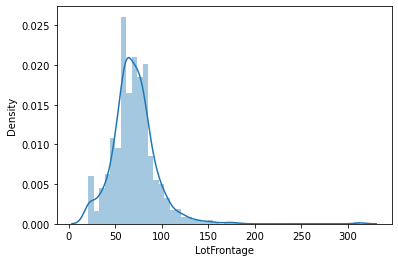

In [140]:
#check the distribution of LotFrontage & MasVnrArea & GaragYrBuilt
sns.distplot(df.LotFrontage)

<AxesSubplot:xlabel='MasVnrArea', ylabel='Density'>

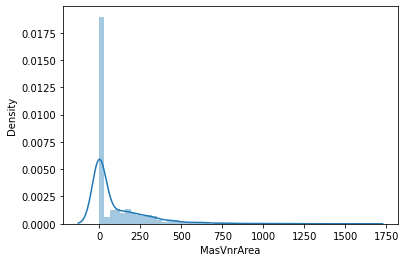

In [141]:
sns.distplot(df.MasVnrArea)

<AxesSubplot:xlabel='GarageYrBlt', ylabel='Density'>

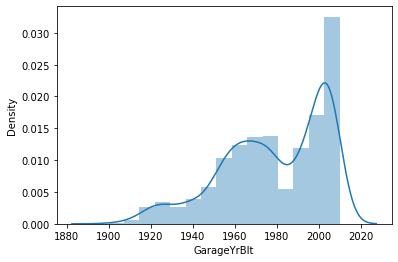

In [142]:
sns.distplot(df.GarageYrBlt)

There is skewness in data for LotFrontage,  MasVnrArea & GarageYrBlt we can use median to impute data

In [143]:
for i in ['LotFrontage','MasVnrArea','GarageYrBlt']:
    df[i]=df[i].fillna(df[i].median())
    df[i]=df[i].astype('int')

In [144]:
#check to confirm no more null values
df.isnull().sum().sum()

0

There are no more null values, we will now work on temporal columns

In [145]:
time_features=[i for i in df if 'Yr' in i or 'Year' in i]
time_features

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [146]:
#Calculate the age of house built,remodelling & garage built from the time its sold
df['AgeBuilt']=df.YrSold-df.YearBuilt
df['AgeRemodeled']=df.YrSold-df.YearRemodAdd
df['AgeGarageBuilt']=df.YrSold-df.GarageYrBlt
df.AgeBuilt=df.AgeBuilt.astype('int')
df.AgeRemodeled=df.AgeRemodeled.astype('int')
df.AgeGarageBuilt=df.AgeGarageBuilt.astype('int')
df.drop(time_features,axis=1, inplace=True)

We can further classify the age into groups

In [147]:
#check if house was remodeled or not
def remodel(df):
    if df.AgeBuilt==df.AgeRemodeled:
        return 0
    elif df.AgeBuilt>df.AgeRemodeled:
        return 1
    
df['Remodeled']=df.apply(remodel,axis=1)

In [148]:
#Age of house after built or remodeled
def age(df):
    
    if df.AgeBuilt==df.AgeRemodeled:
        x=df.AgeBuilt
    if df.AgeBuilt>df.AgeRemodeled:
        x=df.AgeRemodeled
    if x<25:
        return "<25"
    elif x>25 and x<50:
        return "25-50"
    else:
        return ">50"
    
    
df['AgeBltOrRemod']=df.apply(age,axis=1)

In [149]:
#check if garage is new
def garage(df):
    if df.AgeGarageBuilt<=20:
        return 1
    else:
        return 0
    
df['NewGarage']=df.apply(garage,axis=1)

In [150]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,SaleType,SaleCondition,SalePrice,AgeBuilt,AgeRemodeled,AgeGarageBuilt,Remodeled,AgeBltOrRemod,NewGarage
0,1,60,RL,65,8450,Pave,No Alley Access,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,196,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,No Fireplace,Attchd,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,No Pool,No Fence,None,0,2,WD,Normal,208500,5,5,5,0,<25,1
1,2,20,RL,80,9600,Pave,No Alley Access,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,Gable,CompShg,MetalSd,MetalSd,None,0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,No Pool,No Fence,None,0,5,WD,Normal,181500,31,31,31,0,25-50,0
2,3,60,RL,68,11250,Pave,No Alley Access,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,162,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,No Pool,No Fence,None,0,9,WD,Normal,223500,7,6,7,1,<25,1
3,4,70,RL,60,9550,Pave,No Alley Access,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,Gable,CompShg,Wd Sdng,Wd Shng,None,0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,No Pool,No Fence,None,0,2,WD,Abnorml,140000,91,36,8,1,25-50,1
4,5,60,RL,84,14260,Pave,No Alley Access,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,Gable,CompShg,VinylSd,VinylSd,BrkFace,350,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,No Pool,No Fence,None,0,12,WD,Normal,250000,8,8,8,0,<25,1


In [151]:
#dropping Id column since its totally unique and others as they are replaced with new features
df.drop(['Id','AgeBuilt','AgeRemodeled','AgeGarageBuilt'],axis=1,inplace=True)

We need to check the value distribution for each of the features. We will remove those features having  atleast 87% similar data as it would effect the learning of the model

In [152]:
drop_cols=[]
val_prcnt=0
for i in df.columns:
    val_prcnt=np.max(df[i].value_counts(normalize=True)*100)
    if val_prcnt>87:
        print(i,':',val_prcnt)
        drop_cols.append(i)

Street : 99.58904109589041
Alley : 93.76712328767123
LandContour : 89.7945205479452
Utilities : 99.93150684931507
LandSlope : 94.65753424657535
Condition2 : 98.97260273972603
RoofMatl : 98.21917808219179
ExterCond : 87.8082191780822
BsmtCond : 89.7945205479452
BsmtFinSF2 : 88.56164383561645
Heating : 97.80821917808218
CentralAir : 93.4931506849315
Electrical : 91.43835616438356
LowQualFinSF : 98.21917808219179
BsmtHalfBath : 94.3835616438356
KitchenAbvGr : 95.34246575342465
Functional : 93.15068493150685
GarageQual : 89.7945205479452
GarageCond : 90.82191780821918
PavedDrive : 91.78082191780823
3SsnPorch : 98.35616438356163
ScreenPorch : 92.05479452054794
PoolArea : 99.52054794520548
PoolQC : 99.52054794520548
MiscFeature : 96.30136986301369
MiscVal : 96.43835616438356


In [153]:
df.drop(drop_cols,axis=1,inplace=True)

In [154]:
df.shape

(1460, 53)

In [155]:
#select categorical features
cat_cols=df.select_dtypes(include=['object']).columns
print(cat_cols,'\nlength : ',len(cat_cols))

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleType',
       'SaleCondition', 'AgeBltOrRemod'],
      dtype='object') 
length :  26


In [156]:
#selct numerical features
num_cols=df.select_dtypes(include=['int','float']).columns
print(num_cols, '\nlength : ',len(num_cols))


Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF',
       '2ndFlrSF', 'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars',
       'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'MoSold',
       'SalePrice', 'Remodeled', 'NewGarage'],
      dtype='object') 
length :  27


# EDA

## Numerical Variables

### Univariate Analysis

In [157]:
n_cols=num_cols
n_cols=n_cols.drop(['MSSubClass', 'OverallQual', 'OverallCond', 'BsmtFullBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageCars', 'MoSold',
           'Remodeled', 'NewGarage'])
n_cols

Index(['LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1', 'BsmtUnfSF',
       'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'GrLivArea', 'GarageArea',
       'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', 'SalePrice'],
      dtype='object')

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

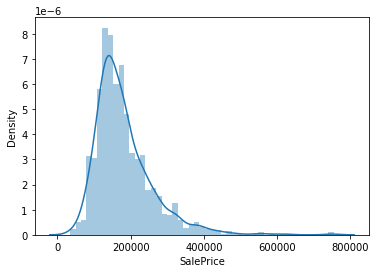

In [158]:
sns.distplot(df.SalePrice)

The target variable is skewed we can apply some transformation on it

After trying different methods we concluded to use ln(1+x)

<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

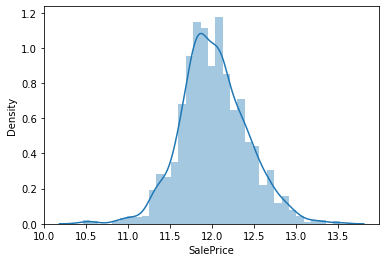

In [159]:
df.SalePrice=np.log1p(df.SalePrice)
sns.distplot(df.SalePrice)

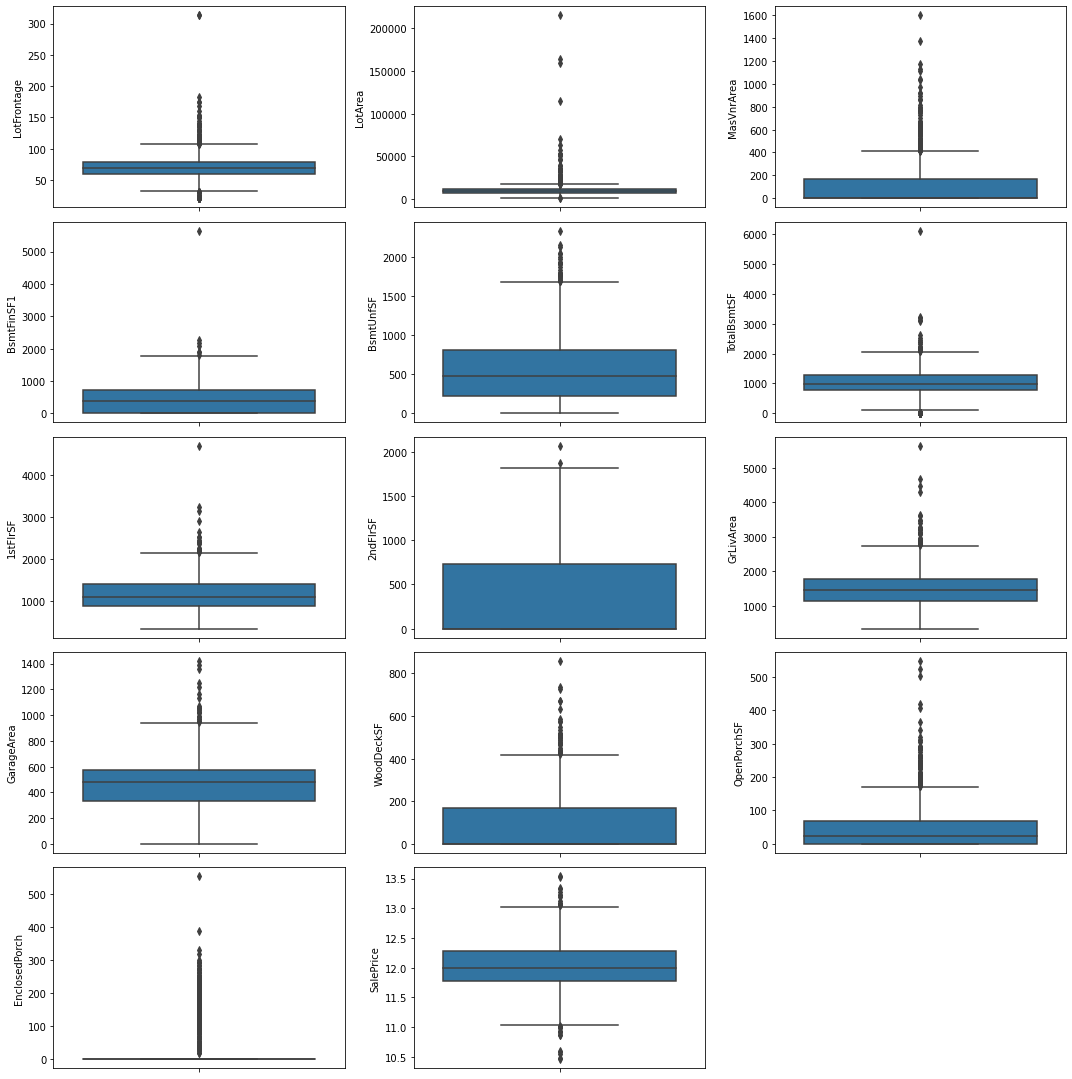

In [160]:
#box plot for outlier detection
plt.figure(figsize=(15,30))
for i in list(enumerate(df[n_cols])):
    plt.subplot(10,3, i[0]+1)
    sns.boxplot(y=df[i[1]],data=df)
plt.tight_layout()
plt.show()

we see a good presence of outliers, but we have to find out a way to to handle them because if we remove anything beyond 25% & 75% we will loose out huge data as the number of rows is not high enough

In [161]:
# function to get outlier percentage
def outliers(x):
    iqr = df[x].quantile(0.75)-df[x].quantile(0.25)
    upper = df[x].quantile(0.75)+iqr*1.5
    lower = df[x].quantile(0.25)-iqr*1.5
    per = ((df[x]<lower).sum()+(df[x]>upper).sum())/len(df[x])*100
    per = round(per,2)
    return per
for i in n_cols:
    out=outliers(i)
    if out>=5:
        print('outlier% in ',i,' : ' ,out)

outlier% in  LotFrontage  :  7.26
outlier% in  MasVnrArea  :  6.71
outlier% in  OpenPorchSF  :  5.27
outlier% in  EnclosedPorch  :  14.25


We will consider outilier removal for features having >5% outliers

We will proceed with removing anything beyond .99 percentile

In [162]:
for i in ['LotFrontage','MasVnrArea','OpenPorchSF','EnclosedPorch']:
    df=df[df[i]<df[i].quantile(0.98)]

In [163]:
df.shape

(1342, 53)

it follows normal distribution but with some noise

### Bivariate Analysis

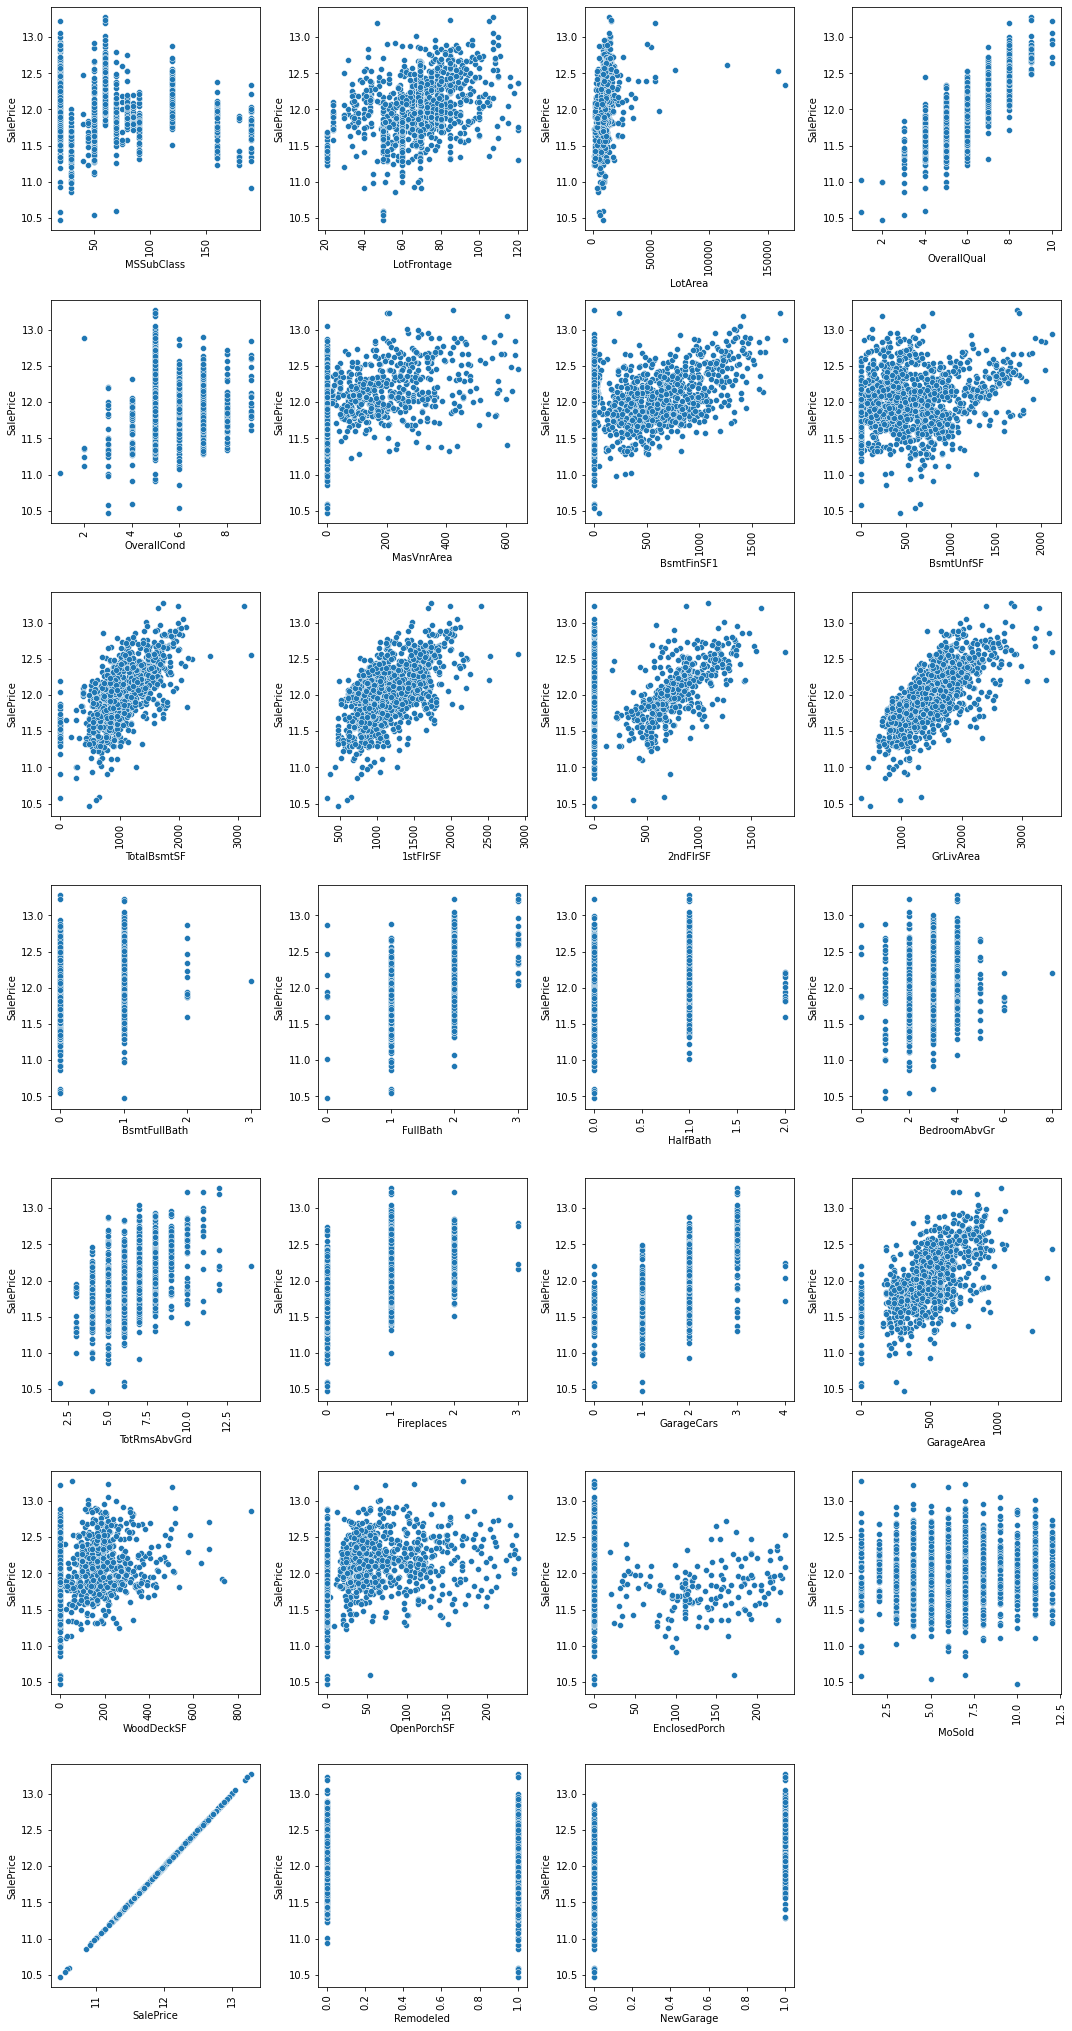

In [164]:
plt.figure(figsize=(15,40))
for i in list(enumerate(num_cols)):
    plt.subplot(10,4, i[0]+1)
    sns.scatterplot(df[i[1]],df.SalePrice)
    plt.xticks(rotation=90)
    
plt.tight_layout()
plt.show()

- If we look into the features apart from the ordinal one's we get to see more or less a linear relationship with the target variable SalePrice  

In [165]:
df

,MSSubClass,MSZoning,LotFrontage,LotArea,LotShape,LotConfig,Neighborhood,Condition1,BldgType,HouseStyle,OverallQual,OverallCond,RoofStyle,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,Foundation,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,1stFlrSF,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,TotRmsAbvGrd,Fireplaces,FireplaceQu,GarageType,GarageFinish,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,SaleType,SaleCondition,SalePrice,Remodeled,AgeBltOrRemod,NewGarage
0,60,RL,65,8450,Reg,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,196,Gd,PConc,Gd,No,GLQ,706,Unf,150,856,Ex,856,854,1710,1,2,1,3,Gd,8,0,No Fireplace,Attchd,RFn,2,548,0,61,0,No Fence,2,WD,Normal,12.247699,0,<25,1
1,20,RL,80,9600,Reg,FR2,Veenker,Feedr,1Fam,1Story,6,8,Gable,MetalSd,MetalSd,None,0,TA,CBlock,Gd,Gd,ALQ,978,Unf,284,1262,Ex,1262,0,1262,0,2,0,3,TA,6,1,TA,Attchd,RFn,2,460,298,0,0,No Fence,5,WD,Normal,12.109016,0,25-50,0
2,60,RL,68,11250,IR1,Inside,CollgCr,Norm,1Fam,2Story,7,5,Gable,VinylSd,VinylSd,BrkFace,162,Gd,PConc,Gd,Mn,GLQ,486,Unf,434,920,Ex,920,866,1786,1,2,1,3,Gd,6,1,TA,Attchd,RFn,2,608,0,42,0,No Fence,9,WD,Normal,12.317171,1,<25,1
4,60,RL,84,14260,IR1,FR2,NoRidge,Norm,1Fam,2Story,8,5,Gable,VinylSd,VinylSd,BrkFace,350,Gd,PConc,Gd,Av,GLQ,655,Unf,490,1145,Ex,1145,1053,2198,1,2,1,4,Gd,9,1,TA,Attchd,RFn,3,836,192,84,0,No Fence,12,WD,Normal,12.429220,0,<25,1
5,50,RL,85,14115,IR1,Inside,Mitchel,Norm,1Fam,1.5Fin,5,5,Gable,VinylSd,VinylSd,None,0,TA,Wood,Gd,No,GLQ,732,Unf,64,796,Ex,796,566,1362,1,1,1,1,TA,5,0,No Fireplace,Attchd,Unf,2,480,40,30,0,MnPrv,10,WD,Normal,11.870607,1,<25,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62,7917,Reg,Inside,Gilbert,Norm,1Fam,2Story,6,5,Gable,VinylSd,VinylSd,None,0,TA,PConc,Gd,No,Unf,0,Unf,953,953,Ex,953,694,1647,0,2,1,3,TA,7,1,TA,Attchd,RFn,2,460,0,40,0,No Fence,8,WD,Normal,12.072547,1,<25,1
1456,20,RL,85,13175,Reg,Inside,NWAmes,Norm,1Fam,1Story,6,6,Gable,Plywood,Plywood,Stone,119,TA,CBlock,Gd,No,ALQ,790,Rec,589,1542,TA,2073,0,2073,1,2,0,3,TA,7,2,TA,Attchd,Unf,2,500,349,0,0,MnPrv,2,WD,Normal,12.254868,1,<25,0
1457,70,RL,66,9042,Reg,Inside,Crawfor,Norm,1Fam,2Story,7,9,Gable,CemntBd,CmentBd,None,0,Ex,Stone,TA,No,GLQ,275,Unf,877,1152,Ex,1188,1152,2340,0,2,0,4,Gd,9,2,Gd,Attchd,RFn,1,252,0,60,0,GdPrv,5,WD,Normal,12.493133,1,<25,0
1458,20,RL,68,9717,Reg,Inside,NAmes,Norm,1Fam,1Story,5,6,Hip,MetalSd,MetalSd,None,0,TA,CBlock,TA,Mn,GLQ,49,Rec,0,1078,Gd,1078,0,1078,1,1,0,2,Gd,5,0,No Fireplace,Attchd,Unf,1,240,366,0,112,No Fence,4,WD,Normal,11.864469,1,<25,0


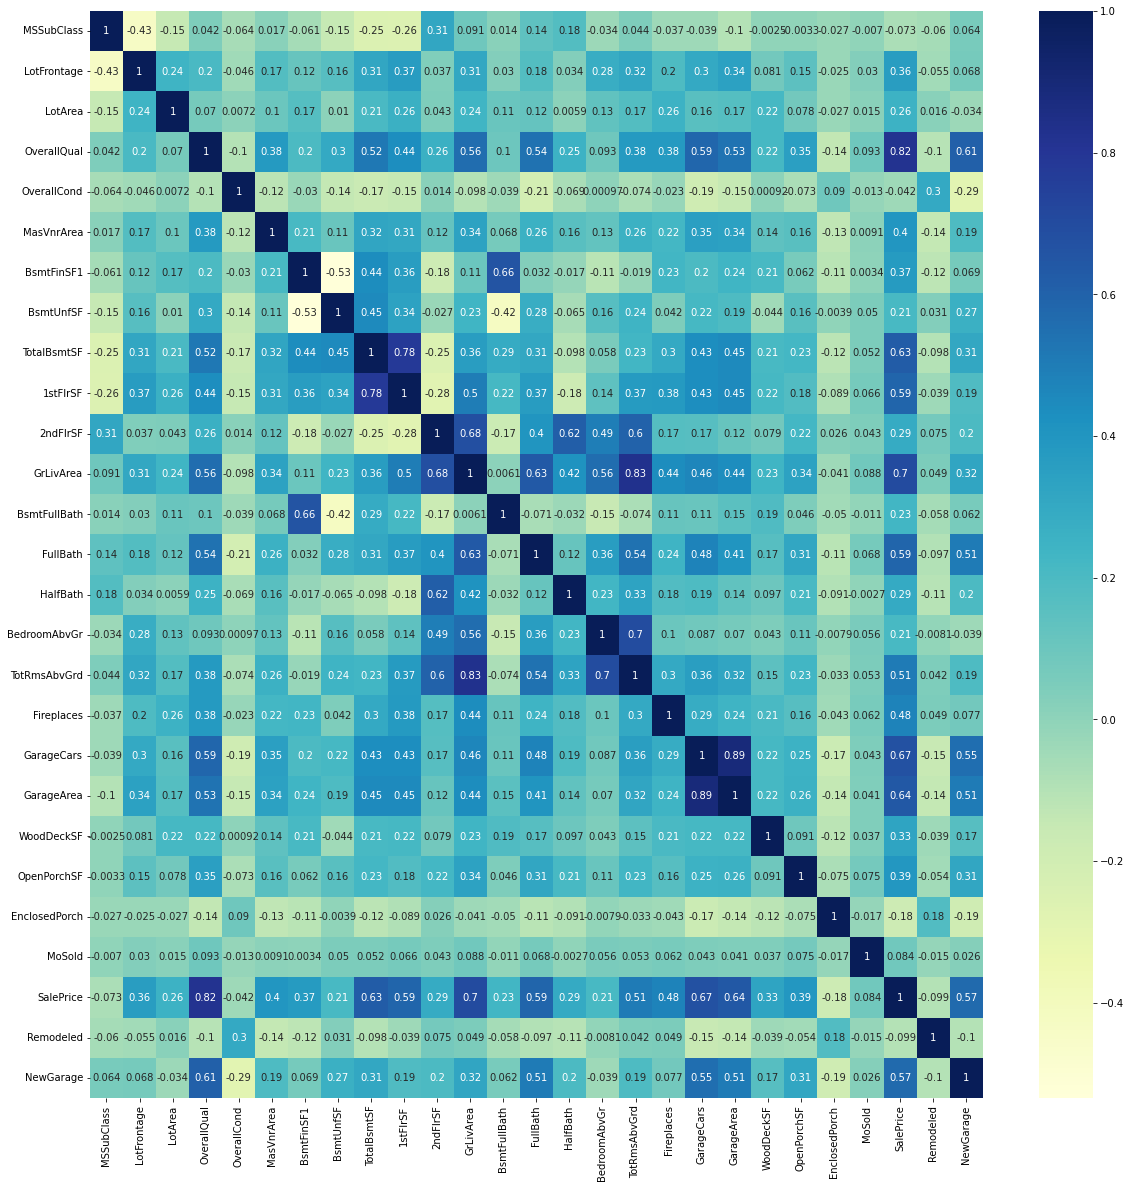

In [166]:
# Check the correlation of numerical columns

plt.figure(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True, cmap="YlGnBu")
plt.show()


Multicollinear variables

- totbsmntsf & 1stflrsf
- grlivarea & totrmsabvgrd
- garagecars & garage area

These can be some of the important features for SalePrice based on Correlation plot

- overallqual
- totbsmntsf
- grlivarea
- fullbath
- garagecars
- newgarage

Multi-collinearity can be reduced by dropping the following variables

- 1stflrsf
- totrmsabvgrd
- garage area

 we dropped this rather than others because it showed less correlation with SalePrice

In [167]:
#dropping column since it is resulting in multicollinearity
df.drop(['1stFlrSF','TotRmsAbvGrd','GarageArea'],axis=1,inplace=True)

In [168]:
df.shape

(1342, 50)

## Categorical Features

In [169]:
cat_cols

Index(['MSZoning', 'LotShape', 'LotConfig', 'Neighborhood', 'Condition1',
       'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd',
       'MasVnrType', 'ExterQual', 'Foundation', 'BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageType', 'GarageFinish', 'Fence', 'SaleType',
       'SaleCondition', 'AgeBltOrRemod'],
      dtype='object')

### Univariate Analysis

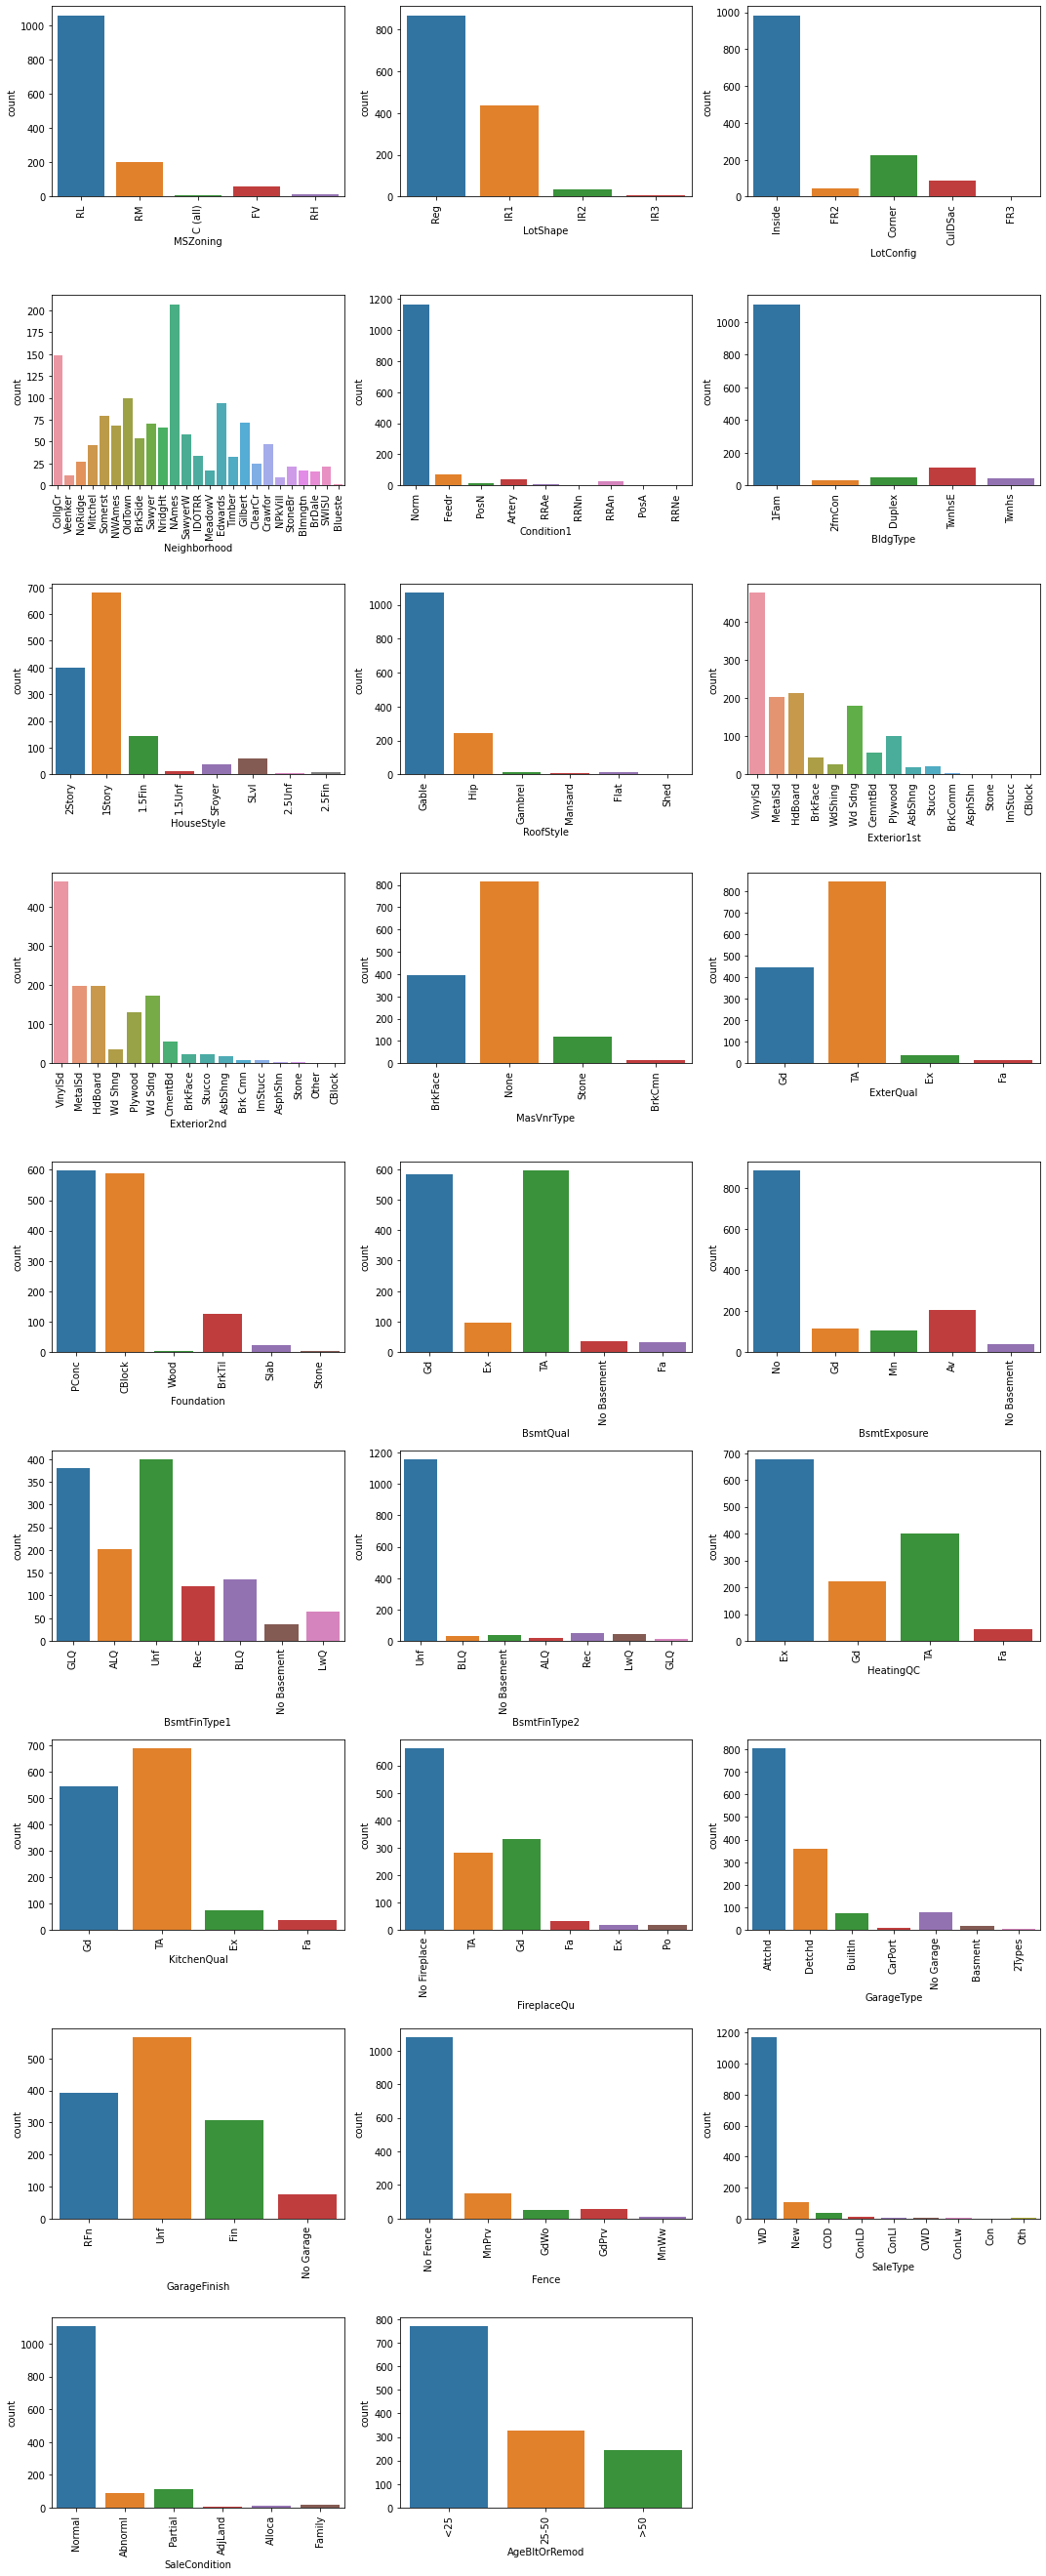

In [170]:
plt.figure(figsize=(15,40))
for i in list(enumerate(cat_cols)):
    plt.subplot(10,3, i[0]+1)
    #sns.boxplot(x=df[i[1]],y=df.cnt,data=df)
    sns.countplot(df[i[1]])
    plt.xticks(rotation=90)
    #plt.xlabel()
    #print(i)
plt.tight_layout()
plt.show()

# - From the above plots it is evident the better ther 

### Bivariate Analysis

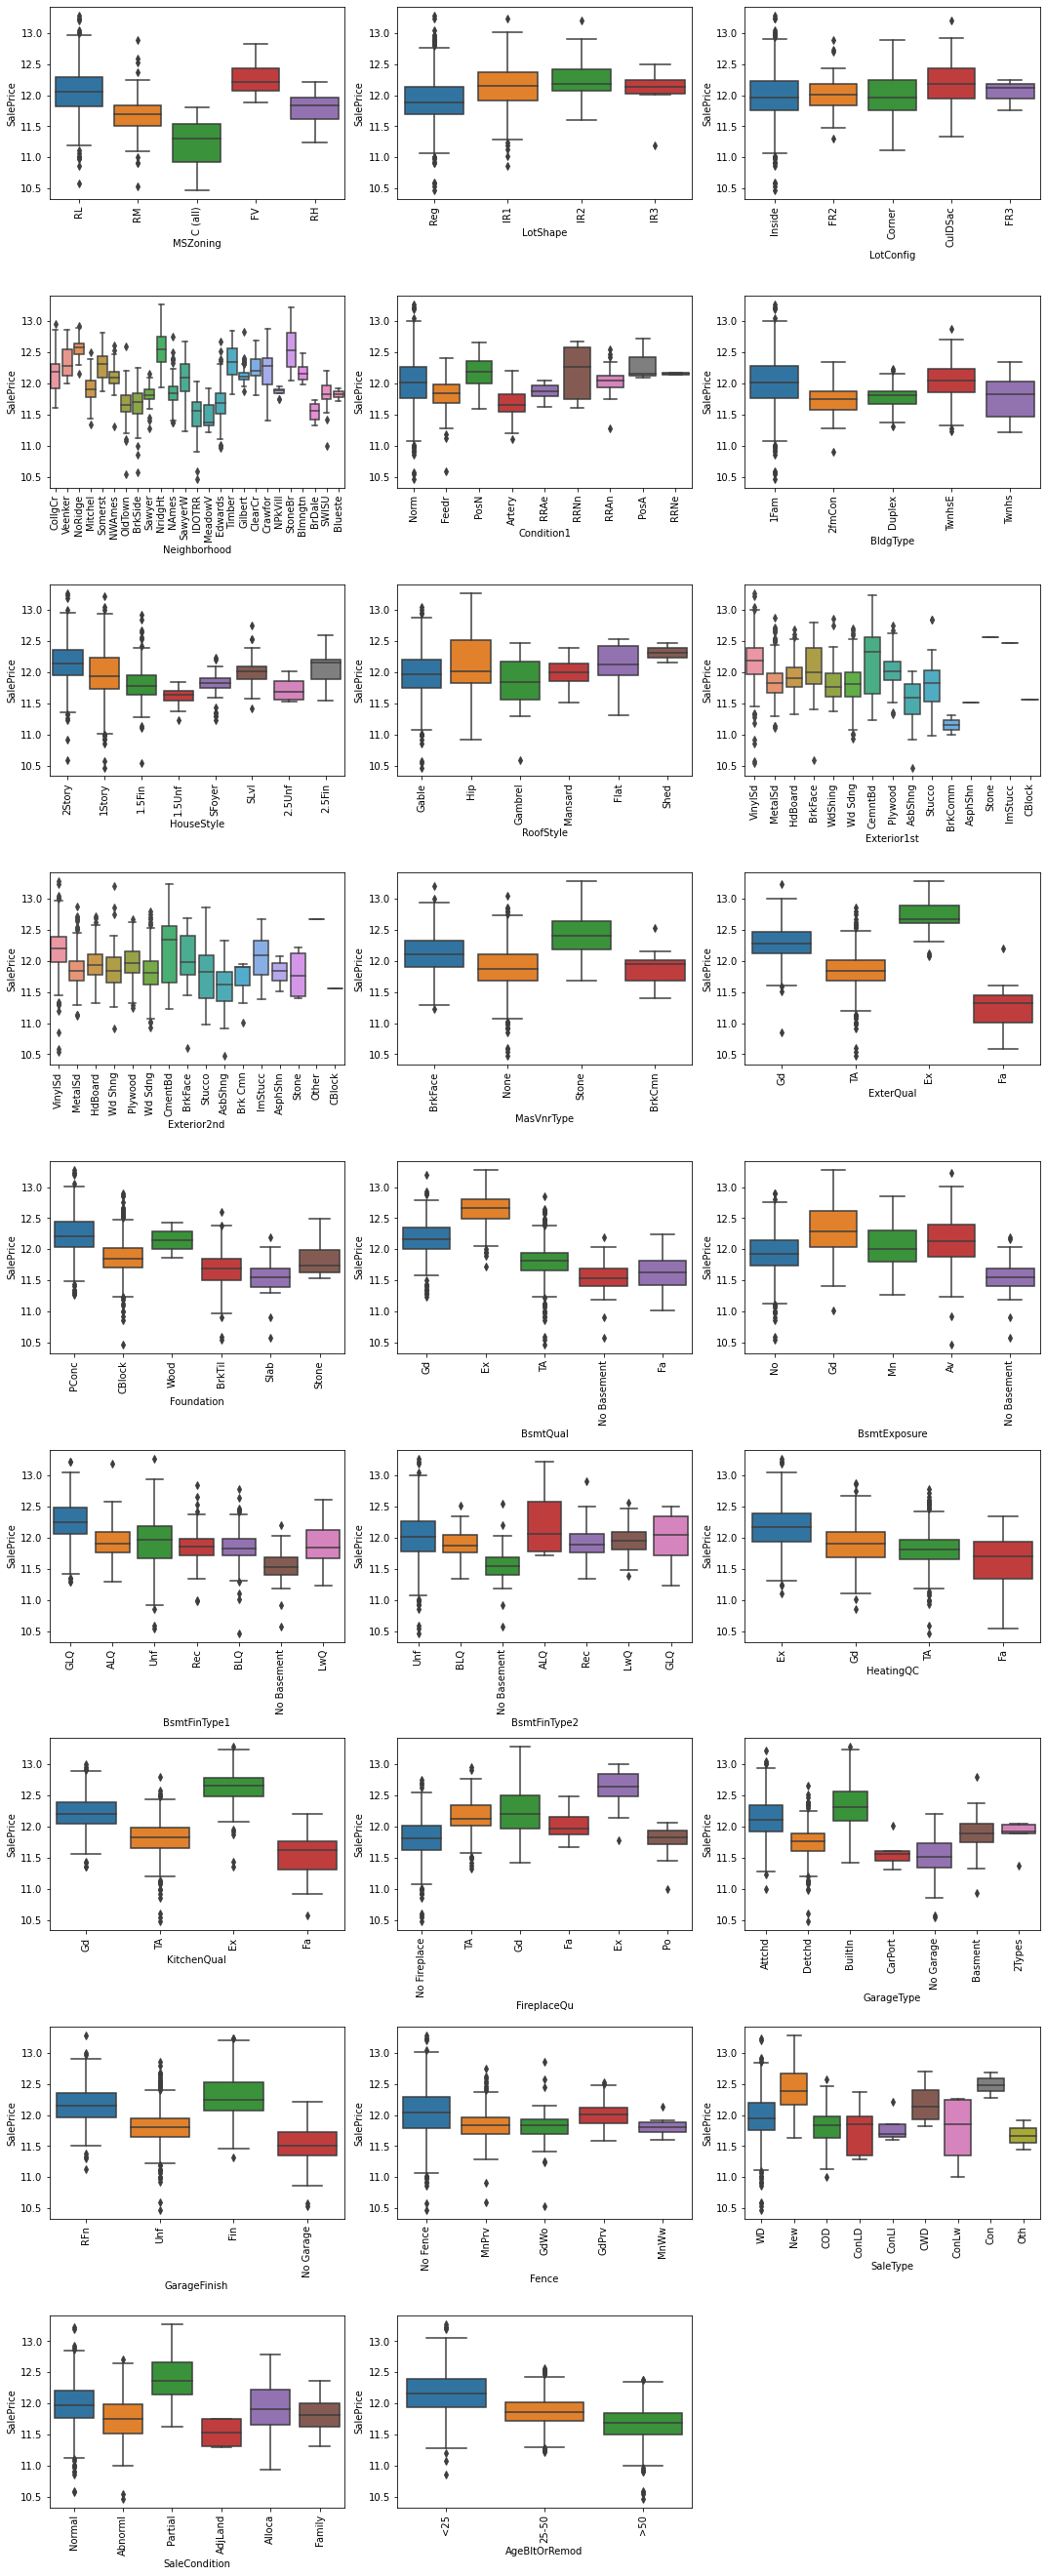

In [171]:
plt.figure(figsize=(15,40))
for i in list(enumerate(cat_cols)):
    plt.subplot(10,3, i[0]+1)
    #sns.boxplot(x=df[i[1]],y=df.cnt,data=df)
    sns.boxplot(df[i[1]],df.SalePrice)
    plt.xticks(rotation=90)
    #plt.xlabel()
    #print(i)
plt.tight_layout()
plt.show()

ordinal

lotshap
exteriorqual
bsmntqual
bsmntexposure
bsmntfintyp1
bsmntfintyp2
heatingqc
kitchnqual
fireplacequ
garagefinish
fence

In [172]:
#taking care of ordinal variables
df.LotShape = df['LotShape'].map({'Reg': 3, 'IR1': 2, 'IR2': 1, 'IR3': 0})
df.ExterQual= df['ExterQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df.BsmtQual = df['BsmtQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Basement': 0})
df.BsmtExposure = df['BsmtExposure'].map({'Gd': 4, 'Av': 3, 'Mn': 2, 'No': 1, 'No Basement': 0})
df.BsmtFinType1 = df['BsmtFinType1'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec':3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0})
df.BsmtFinType2 = df['BsmtFinType2'].map({'GLQ': 6, 'ALQ': 5, 'BLQ': 4, 'Rec':3, 'LwQ': 2, 'Unf': 1, 'No Basement': 0})
df.HeatingQC = df['HeatingQC'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df.KitchenQual = df['KitchenQual'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1})
df.FireplaceQu = df['FireplaceQu'].map({'Ex': 5, 'Gd': 4, 'TA': 3, 'Fa': 2, 'Po': 1, 'No Fireplace': 0})
df.GarageFinish = df['GarageFinish'].map({'Fin': 3, 'RFn': 2, 'Unf': 1, 'No Garage': 0 })
df.Fence = df['Fence'].map({'GdPrv': 4, 'GdWo': 3, 'MnPrv': 2, 'MnWw': 1, 'No Fence': 0})


In [173]:
df.isnull().sum().sum()

0

In [174]:
#dummy variables set
cat_cols=cat_cols.drop(['LotShape', 'ExterQual','BsmtQual', 'BsmtExposure',
       'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'KitchenQual',
       'FireplaceQu', 'GarageFinish', 'Fence'])
cat_cols

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'GarageType', 'SaleType', 'SaleCondition',
       'AgeBltOrRemod'],
      dtype='object')

In [175]:
cat_cols

Index(['MSZoning', 'LotConfig', 'Neighborhood', 'Condition1', 'BldgType',
       'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'Foundation', 'GarageType', 'SaleType', 'SaleCondition',
       'AgeBltOrRemod'],
      dtype='object')

In [176]:
#dummy variables
dummy=df[cat_cols]
dummy=pd.get_dummies(dummy,drop_first=True)

In [177]:

df=pd.concat([df,dummy],axis=1)


In [178]:
df.drop(cat_cols,axis=1,inplace=True)

In [179]:
df.shape

(1342, 149)

In [180]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 1342 entries, 0 to 1459
Columns: 149 entries, MSSubClass to AgeBltOrRemod_>50
dtypes: float64(1), int64(34), uint8(114)
memory usage: 526.8 KB


In [181]:
y=df.pop('SalePrice')
x=df

In [182]:
x

,MSSubClass,LotFrontage,LotArea,LotShape,OverallQual,OverallCond,MasVnrArea,ExterQual,BsmtQual,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtUnfSF,TotalBsmtSF,HeatingQC,2ndFlrSF,GrLivArea,BsmtFullBath,FullBath,HalfBath,BedroomAbvGr,KitchenQual,Fireplaces,FireplaceQu,GarageFinish,GarageCars,WoodDeckSF,OpenPorchSF,EnclosedPorch,Fence,MoSold,Remodeled,NewGarage,MSZoning_FV,MSZoning_RH,MSZoning_RL,MSZoning_RM,LotConfig_CulDSac,LotConfig_FR2,LotConfig_FR3,LotConfig_Inside,Neighborhood_Blueste,Neighborhood_BrDale,Neighborhood_BrkSide,Neighborhood_ClearCr,Neighborhood_CollgCr,Neighborhood_Crawfor,Neighborhood_Edwards,Neighborhood_Gilbert,Neighborhood_IDOTRR,Neighborhood_MeadowV,Neighborhood_Mitchel,Neighborhood_NAmes,Neighborhood_NPkVill,Neighborhood_NWAmes,Neighborhood_NoRidge,Neighborhood_NridgHt,Neighborhood_OldTown,Neighborhood_SWISU,Neighborhood_Sawyer,Neighborhood_SawyerW,Neighborhood_Somerst,Neighborhood_StoneBr,Neighborhood_Timber,Neighborhood_Veenker,Condition1_Feedr,Condition1_Norm,Condition1_PosA,Condition1_PosN,Condition1_RRAe,Condition1_RRAn,Condition1_RRNe,Condition1_RRNn,BldgType_2fmCon,BldgType_Duplex,BldgType_Twnhs,BldgType_TwnhsE,HouseStyle_1.5Unf,HouseStyle_1Story,HouseStyle_2.5Fin,HouseStyle_2.5Unf,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,RoofStyle_Gable,RoofStyle_Gambrel,RoofStyle_Hip,RoofStyle_Mansard,RoofStyle_Shed,Exterior1st_AsphShn,Exterior1st_BrkComm,Exterior1st_BrkFace,Exterior1st_CBlock,Exterior1st_CemntBd,Exterior1st_HdBoard,Exterior1st_ImStucc,Exterior1st_MetalSd,Exterior1st_Plywood,Exterior1st_Stone,Exterior1st_Stucco,Exterior1st_VinylSd,Exterior1st_Wd Sdng,Exterior1st_WdShing,Exterior2nd_AsphShn,Exterior2nd_Brk Cmn,Exterior2nd_BrkFace,Exterior2nd_CBlock,Exterior2nd_CmentBd,Exterior2nd_HdBoard,Exterior2nd_ImStucc,Exterior2nd_MetalSd,Exterior2nd_Other,Exterior2nd_Plywood,Exterior2nd_Stone,Exterior2nd_Stucco,Exterior2nd_VinylSd,Exterior2nd_Wd Sdng,Exterior2nd_Wd Shng,MasVnrType_BrkFace,MasVnrType_None,MasVnrType_Stone,Foundation_CBlock,Foundation_PConc,Foundation_Slab,Foundation_Stone,Foundation_Wood,GarageType_Attchd,GarageType_Basment,GarageType_BuiltIn,GarageType_CarPort,GarageType_Detchd,GarageType_No Garage,SaleType_CWD,SaleType_Con,SaleType_ConLD,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial,AgeBltOrRemod_<25,AgeBltOrRemod_>50
0,60,65,8450,3,7,5,196,4,4,1,6,706,1,150,856,5,854,1710,1,2,1,3,4,0,0,2,2,0,61,0,0,2,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
1,20,80,9600,3,6,8,0,3,4,4,5,978,1,284,1262,5,0,1262,0,2,0,3,3,1,3,2,2,298,0,0,0,5,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0
2,60,68,11250,2,7,5,162,4,4,2,6,486,1,434,920,5,866,1786,1,2,1,3,4,1,3,2,2,0,42,0,0,9,1,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
4,60,84,14260,2,8,5,350,4,4,3,6,655,1,490,1145,5,1053,2198,1,2,1,4,4,1,3,2,3,192,84,0,0,12,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,1,0
5,50,85,14115,2,5,5,0,3,4,1,6,732,1,64,796,5,566,1362,1,1,1,1,3,0,0,1,2,40,30,0,2,10,1,1,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1,1,0,0,0,

## Scaling

In [183]:
# scaling the features
from sklearn.preprocessing import scale
cols = x.columns
x = pd.DataFrame(scale(x))
x.columns = cols
x.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'LotShape', 'OverallQual',
       'OverallCond', 'MasVnrArea', 'ExterQual', 'BsmtQual', 'BsmtExposure',
       ...
       'SaleType_New', 'SaleType_Oth', 'SaleType_WD', 'SaleCondition_AdjLand',
       'SaleCondition_Alloca', 'SaleCondition_Family', 'SaleCondition_Normal',
       'SaleCondition_Partial', 'AgeBltOrRemod_<25', 'AgeBltOrRemod_>50'],
      dtype='object', length=148)

## Train Test Split

In [507]:
# split into train and test
from sklearn.model_selection import train_test_split
np.random.seed(0)
x_train, x_test, y_train, y_test = train_test_split(x, y,train_size=0.7,test_size = 0.3, random_state=70)

In [508]:
lr = LinearRegression()
# Fit a line
lr.fit(x_train, y_train)

LinearRegression()

In [509]:
rfe = RFE(lr,n_features_to_select=40)            
rfe = rfe.fit(x_train, y_train)

In [510]:
y_pred_train = rfe.predict(x_train)
y_pred_test = rfe.predict(x_test)

metric = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test:',r2_test_lr)
metric.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train:',rss1_lr)
metric.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test:',rss2_lr)
metric.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train:',mse_train_lr)
metric.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test:',mse_test_lr)
metric.append(mse_test_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE Train:',mse_train_lr**0.5)
metric.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE Test:',mse_test_lr**0.5)
metric.append(mse_test_lr**0.5)

R2 Train: 0.919620438848259
R2 Test: 0.9004532339260203
RSS Train: 10.8292995843108
RSS Test: 5.88770170407156
MSE Train: 0.011532800409276676
MSE Test: 0.014609681647820248
RMSE Train: 0.10739087675066572
RMSE Test: 0.12087051604018346


In [511]:
#store the features selected by RFE

rfe_cols = x_train.columns[rfe.support_]
x_train = x_train[rfe_cols]
x_test =  x_test[rfe_cols]

In [512]:
x_train.shape

(939, 40)

In [513]:
#Ridge
params = {'alpha': 
[0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
#np.arange(0.0001,500,2)
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [516]:
#Ridge
params = {'alpha': 
         
[6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0 ]}
#np.arange(6,7,0.1)}
ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error',  
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(x_train, y_train)

Fitting 5 folds for each of 11 candidates, totalling 55 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8,
                                   6.9, 7.0]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [517]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_['alpha'])

6.8


In [518]:
#printing coefficients which have been penalised
alpha = model_cv.best_params_['alpha']
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)


Ridge(alpha=6.8)

In [519]:
print(ridge.coef_)

[-0.01560067  0.0187355   0.08921649  0.04649027  0.01775056  0.02033823
  0.01822294 -0.03028622  0.06068167  0.11872463  0.02302805  0.02121402
  0.03757691  0.03347697  0.06928988  0.03964912  0.14355053  0.08658408
  0.01855568  0.02154604  0.01600933  0.02170905 -0.01221976 -0.033117
  0.01017458  0.02034473  0.00529832  0.03674193  0.04785288  0.01679135
  0.01209671  0.03112965  0.00452592  0.01745324  0.00821131  0.01366326
  0.00034324 -0.00245247  0.02829529  0.04242075]


In [520]:
y_pred_train = ridge.predict(x_train)
y_pred_test = ridge.predict(x_test)

metric2 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric2.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test:',r2_test_lr)
metric2.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train:',rss1_lr)
metric2.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test:',rss2_lr)
metric2.append(rss2_lr)


mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train:',mse_train_lr)
metric2.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test:',mse_test_lr)
metric2.append(mse_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE Train:',mse_train_lr**0.5)
metric2.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE Test:',mse_test_lr**0.5)
metric2.append(mse_test_lr**0.5)

R2 Train: 0.9187973934682216
R2 Test: 0.9047156561938137
RSS Train: 10.9401860443038
RSS Test: 5.6356003868785
MSE Train: 0.011650890356021086
MSE Test: 0.01398412006669603
RMSE Train: 0.10793929014043536
RMSE Test: 0.11825447165623815


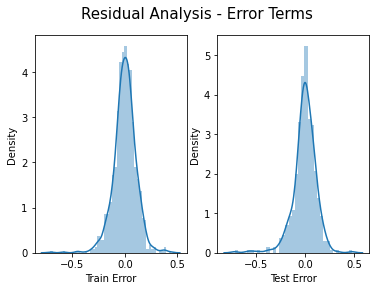

In [466]:
#distribution plot of error terms
plt.suptitle("Residual Analysis - Error Terms",fontsize=15)
plt.subplot(1,2,1)
sns.distplot((y_train-y_pred_train))
plt.xlabel("Train Error")
plt.subplot(1,2,2)
sns.distplot((y_test-y_pred_test))
plt.xlabel("Test Error")
plt.show()

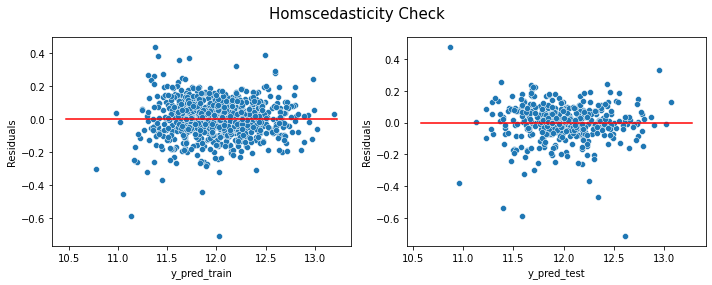

In [467]:
#distribution of error terms to check constant variance
plt.figure(figsize=(10,4))
plt.suptitle("Homscedasticity Check",fontsize=15)
plt.subplot(1,2,1)
a=sns.scatterplot(y_pred_train,(y_train-y_pred_train))
a=sns.lineplot([np.min(y_train),np.max(y_train)],[0,0],color='red')
plt.xlabel("y_pred_train")
plt.ylabel("Residuals")
plt.subplot(1,2,2)
b=sns.scatterplot(y_pred_test,(y_test-y_pred_test))
b=sns.lineplot([np.min(y_test),np.max(y_test)],[0,0],color='red')
plt.xlabel("y_pred_test")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


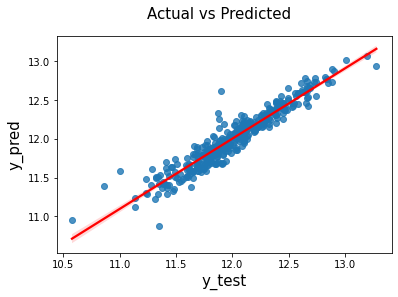

In [468]:
#Actual vs Predicted
fig=plt.figure()
plt.suptitle('Actual vs Predicted',fontsize=15)
sns.regplot(y_test,y_pred_test,line_kws={'color':'red'})
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_pred",fontsize=15)
plt.show()


In [469]:
#Lasso
lasso = Lasso()

params = {'alpha': [0.0001, 0.0002, 0.0003,0.0004,0.0005,0.0006,0.0007,0.0008,0.0009,0.001,0.002,0.003,0.004,
 0.005,0.006,0.007,0.008,0.009,0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
# cross validation
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(x_train, y_train) 

Fitting 5 folds for each of 44 candidates, totalling 220 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.0002, 0.0003, 0.0004, 0.0005,
                                   0.0006, 0.0007, 0.0008, 0.0009, 0.001, 0.002,
                                   0.003, 0.004, 0.005, 0.006, 0.007, 0.008,
                                   0.009, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5,
                                   0.6, 0.7, 0.8, 0.9, 1.0, ...]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [470]:
# Printing the best hyperparameter alpha
print(model_cv.best_params_)

{'alpha': 0.0004}


In [471]:
alpha =model_cv.best_params_['alpha']

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0004)

In [472]:
y_pred_train = lasso.predict(x_train)
y_pred_test = lasso.predict(x_test)

metric3 = []
r2_train_lr = r2_score(y_train, y_pred_train)
print('R2 Train:',r2_train_lr)
metric3.append(r2_train_lr)

r2_test_lr = r2_score(y_test, y_pred_test)
print('R2 Test:',r2_test_lr)
metric3.append(r2_test_lr)

rss1_lr = np.sum(np.square(y_train - y_pred_train))
print('RSS Train:',rss1_lr)
metric3.append(rss1_lr)

rss2_lr = np.sum(np.square(y_test - y_pred_test))
print('RSS Test:',rss2_lr)
metric3.append(rss2_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('MSE Train:',mse_train_lr)
metric3.append(mse_train_lr)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('MSE Test:',mse_test_lr)
metric3.append(mse_test_lr)

mse_train_lr = mean_squared_error(y_train, y_pred_train)
print('RMSE Train:',mse_train_lr**0.5)
metric3.append(mse_train_lr**0.5)

mse_test_lr = mean_squared_error(y_test, y_pred_test)
print('RMSE Test:',mse_test_lr**0.5)
metric3.append(mse_test_lr**0.5)

R2 Train: 0.9190287429990769
R2 Test: 0.9038625891575646
RSS Train: 10.909017009011464
RSS Test: 5.686055107218472
MSE Train: 0.011617696495219876
MSE Test: 0.014109317883916804
RMSE Train: 0.10778541875049646
RMSE Test: 0.11878264975962105


In [473]:

feature_sel_model = SelectFromModel(Lasso(alpha=alpha, random_state=100))
feature_sel_model.fit(x_train, y_train)

SelectFromModel(estimator=Lasso(alpha=0.0004, random_state=100))

In [474]:
feature_sel_model.get_support()

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
        True, False,  True,  True])

In [475]:
selected_feat = x_train.columns[(feature_sel_model.get_support())]
len(selected_feat)

37

In [476]:
lasso.coef_

array([-0.01557667,  0.01829477,  0.09002482,  0.04617202,  0.01694804,
        0.02059583,  0.01708137, -0.03121367,  0.06125133,  0.11943356,
        0.02267318,  0.02086446,  0.03735905,  0.03337722,  0.08067835,
        0.04423489,  0.16465672,  0.10438716,  0.01791764,  0.02096535,
        0.01493635,  0.02140945, -0.00157033, -0.03118493,  0.        ,
        0.01815812,  0.00512573,  0.03529582,  0.04667535,  0.01576157,
        0.01278707,  0.0154523 ,  0.00104325,  0.00970927,  0.00625286,
        0.        , -0.00683614, -0.        ,  0.02755572,  0.0396641 ])

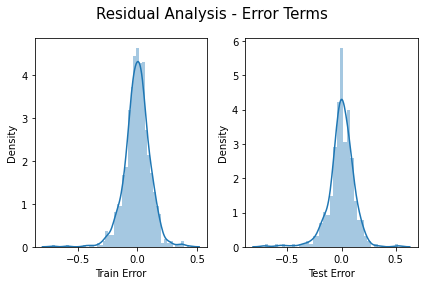

In [477]:
#distribution plot of error terms
plt.suptitle("Residual Analysis - Error Terms",fontsize=15)
plt.subplot(1,2,1)
sns.distplot((y_train-y_pred_train))
plt.xlabel("Train Error")
plt.subplot(1,2,2)
sns.distplot((y_test-y_pred_test))
plt.xlabel("Test Error")
plt.tight_layout()
plt.show()

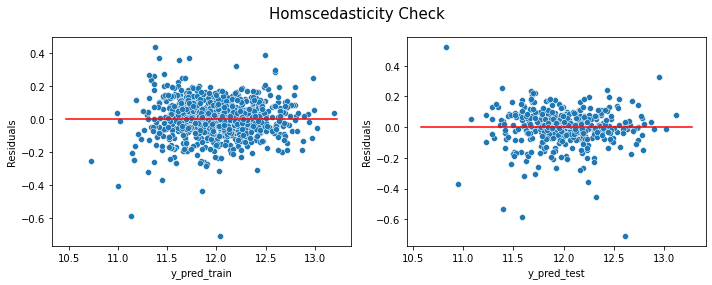

In [478]:
#distribution of error terms to check constant variance
plt.figure(figsize=(10,4))
plt.suptitle("Homscedasticity Check",fontsize=15)
plt.subplot(1,2,1)
a=sns.scatterplot(y_pred_train,(y_train-y_pred_train))
a=sns.lineplot([np.min(y_train),np.max(y_train)],[0,0],color='red')
plt.xlabel("y_pred_train")
plt.ylabel("Residuals")
plt.subplot(1,2,2)
b=sns.scatterplot(y_pred_test,(y_test-y_pred_test))
b=sns.lineplot([np.min(y_test),np.max(y_test)],[0,0],color='red')
plt.xlabel("y_pred_test")
plt.ylabel("Residuals")
plt.tight_layout()
plt.show()


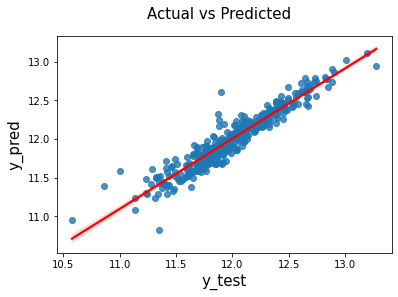

In [479]:
#Actual vs Predicted
fig=plt.figure()
ax1=fig.add_subplot(111)
plt.suptitle('Actual vs Predicted',fontsize=15)
#ax1.scatter(y_test,c='b',label='y_test')
#ax1.scatter(y_pred,c='r',label='y_pred')
sns.regplot(y_test,y_pred_test,line_kws={'color':'red'})
plt.xlabel("y_test",fontsize=15)
plt.ylabel("y_pred",fontsize=15)
plt.show()


In [485]:
# Creating a table which contain all the metrics

table = {'Metric': ['R2 Score (Train)','R2 Score (Test)','RSS (Train)','RSS (Test)',
                       'MSE (Train)','MSE (Test)','RMSE (Train)','RMSE (Test)'], 
        'Linear Regression': metric
        }

lr_metric = pd.DataFrame(table ,columns = ['Metric', 'Linear Regression'] )

rg_metric = pd.Series(metric2, name = 'Ridge Regression')
ls_metric = pd.Series(metric3, name = 'Lasso Regression')

final = pd.concat([lr_metric, rg_metric, ls_metric], axis = 1)

final

,Metric,Linear Regression,Ridge Regression,Lasso Regression
0,R2 Score (Train),0.919620,0.918796,0.919029
1,R2 Score (Test),0.900453,0.904719,0.903863
2,RSS (Train),10.829300,10.940409,10.909017
3,RSS (Test),5.887702,5.635375,5.686055
4,MSE (Train),0.011533,0.011651,0.011618
5,MSE (Test),0.014610,0.013984,0.014109
6,RMSE (Train),0.107391,0.107940,0.107785
7,RMSE (Test),0.120871,0.118252,0.118783


### Optimal Alpha Values

- Ridge : 6.8
- Lasso : 0.0004

### Feature Significance

The variables along with its significance is displayed below which can help the company determine which parameters are important to look into

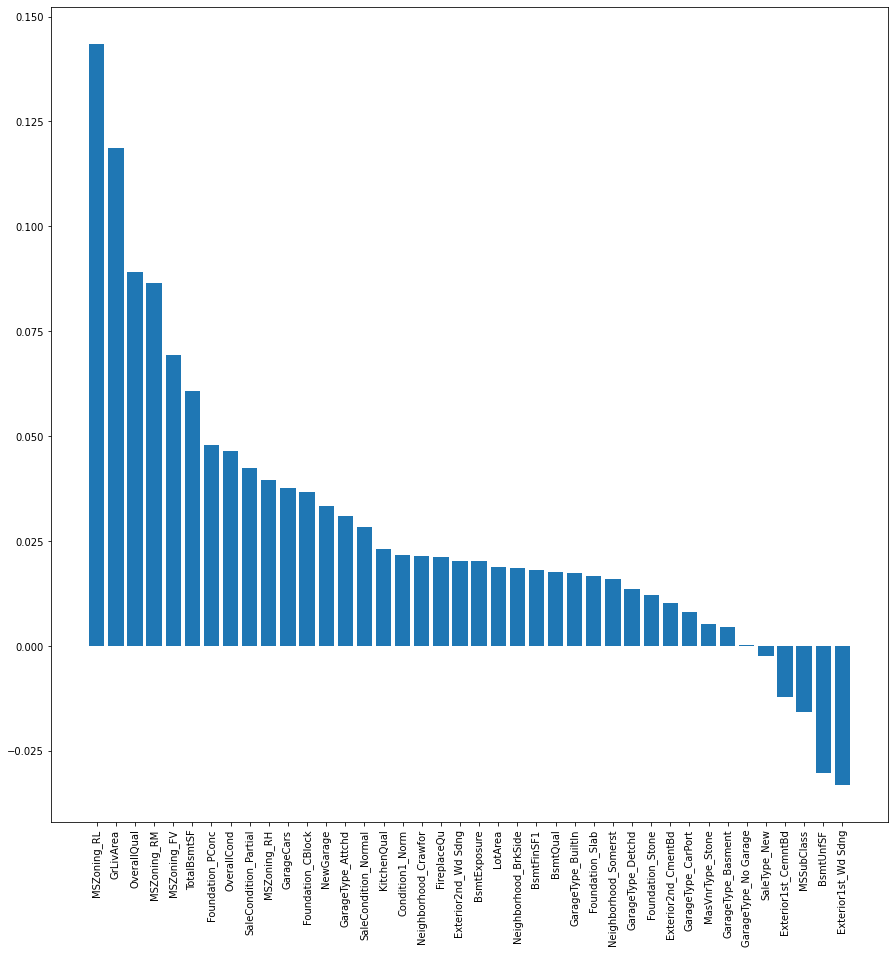

In [480]:
# Ridge Coefficient wise ranking
features_ridge=pd.DataFrame({'Features':x_train.columns,'Ridge Coeff':ridge.coef_})

features_ridge=features_ridge.sort_values(by=['Ridge Coeff'],ascending=False)
plt.figure(figsize=(15,15))
plt.bar(features_ridge['Features'],features_ridge['Ridge Coeff'])
plt.xticks(rotation=90)
plt.show()

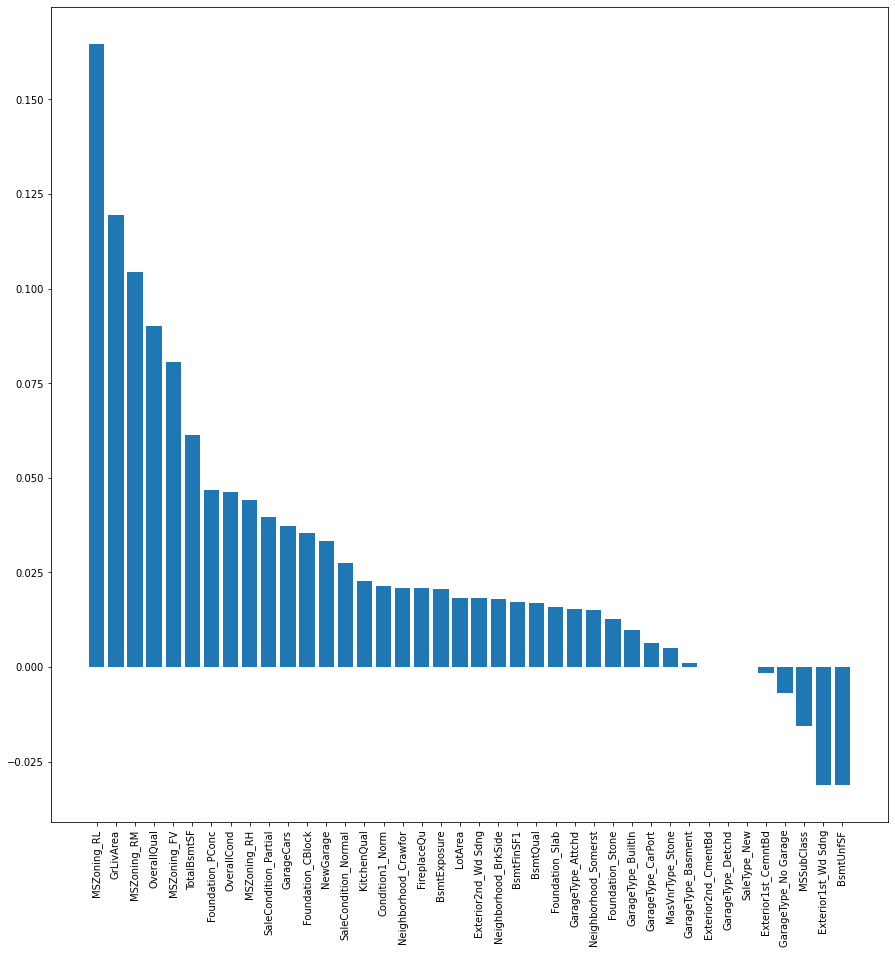

In [481]:
# Lasso Coefficient wise ranking
features_lasso=pd.DataFrame({'Features':x_train.columns,'Lasso Coeff':lasso.coef_})

features_lasso=features_lasso.sort_values(by=['Lasso Coeff'],ascending=False)


plt.figure(figsize=(15,15))
plt.bar(features_lasso['Features'],features_lasso['Lasso Coeff'])
plt.xticks(rotation=90)
plt.show()


## Assignment 2 workings

Doubling the alpha value for
- Ridge
  - 6.8 * 2 = 13.6
- Lasso
  - 0.0004 * 2 = 0.0008

In [522]:
#ridge
alpha = 13.6
ridge = Ridge(alpha=alpha)

ridge.fit(x_train, y_train)


Ridge(alpha=13.6)

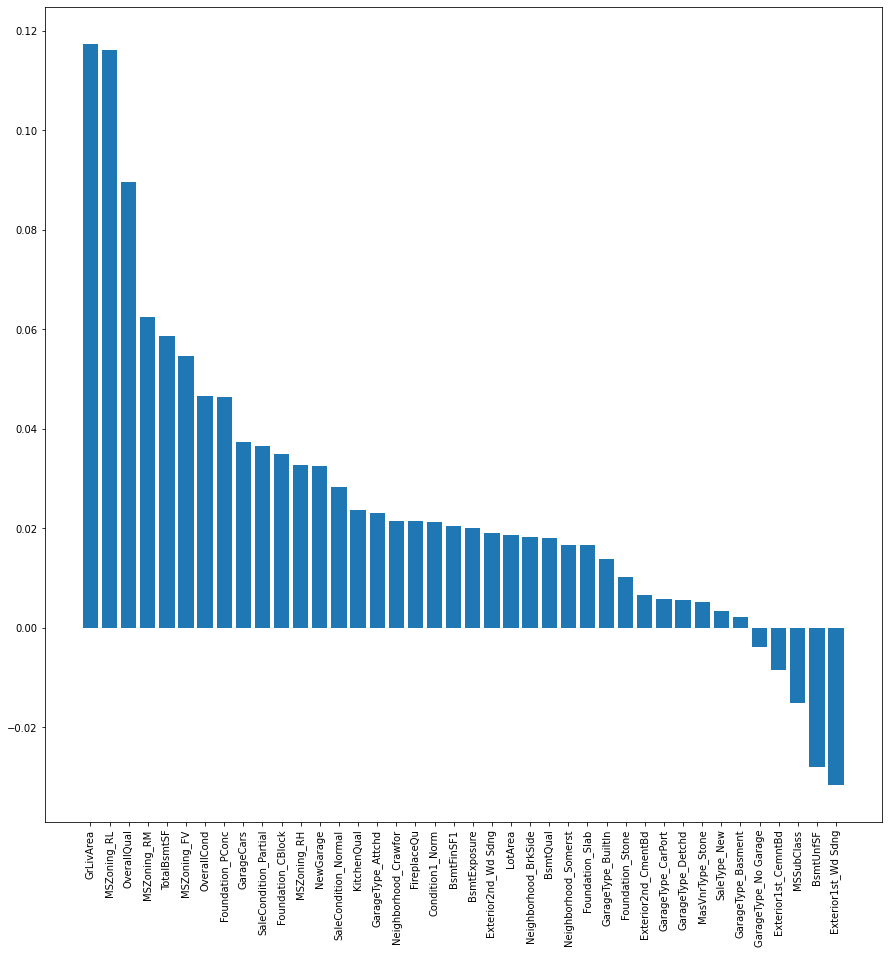

In [523]:
# Ridge Coefficient wise ranking after doubling
features_ridge=pd.DataFrame({'Features':x_train.columns,'Ridge Coeff':ridge.coef_})

features_ridge=features_ridge.sort_values(by=['Ridge Coeff'],ascending=False)
plt.figure(figsize=(15,15))
plt.bar(features_ridge['Features'],features_ridge['Ridge Coeff'])
plt.xticks(rotation=90)
plt.show()

In [526]:
#lasso
alpha =0.0008

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0008)

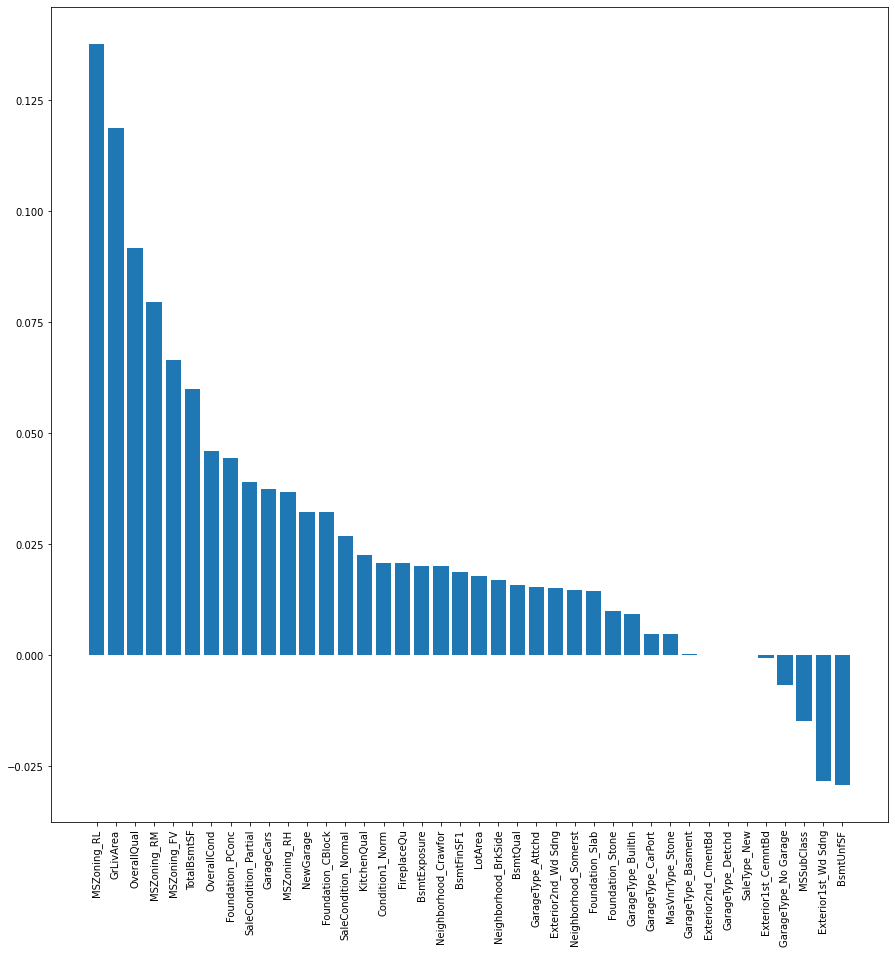

In [527]:
# Lasso Coefficient wise ranking
features_lasso=pd.DataFrame({'Features':x_train.columns,'Lasso Coeff':lasso.coef_})

features_lasso=features_lasso.sort_values(by=['Lasso Coeff'],ascending=False)


plt.figure(figsize=(15,15))
plt.bar(features_lasso['Features'],features_lasso['Lasso Coeff'])
plt.xticks(rotation=90)
plt.show()


Ans 3

In [531]:
#lasso
alpha =0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0004)

In [532]:
# Lasso Coefficient wise ranking
features_lasso=pd.DataFrame({'Features':x_train.columns,'Lasso Coeff':lasso.coef_})

features_lasso=features_lasso.sort_values(by=['Lasso Coeff'],ascending=False)
features_lasso


,Features,Lasso Coeff
16,MSZoning_RL,0.164657
9,GrLivArea,0.119434
17,MSZoning_RM,0.104387
2,OverallQual,0.090025
14,MSZoning_FV,0.080678
8,TotalBsmtSF,0.061251
28,Foundation_PConc,0.046675
3,OverallCond,0.046172
15,MSZoning_RH,0.044235
39,SaleCondition_Partial,0.039664


In [540]:
# remove top 5 
x_train=x_train[features_lasso.Features[5:]]

In [541]:
x_train

,TotalBsmtSF,Foundation_PConc,OverallCond,MSZoning_RH,SaleCondition_Partial,GarageCars,Foundation_CBlock,NewGarage,SaleCondition_Normal,KitchenQual,Condition1_Norm,Neighborhood_Crawfor,FireplaceQu,BsmtExposure,LotArea,Exterior2nd_Wd Sdng,Neighborhood_BrkSide,BsmtFinSF1,BsmtQual,Foundation_Slab,GarageType_Attchd,Neighborhood_Somerst,Foundation_Stone,GarageType_BuiltIn,GarageType_CarPort,MasVnrType_Stone,GarageType_Basment,Exterior2nd_CmentBd,GarageType_Detchd,SaleType_New,Exterior1st_CemntBd,GarageType_No Garage,MSSubClass,Exterior1st_Wd Sdng,BsmtUnfSF
1087,0.457815,-0.895177,-0.518707,-0.102675,-0.298807,0.344439,-0.883086,1.165557,0.460744,-0.759891,0.389784,-0.190508,-0.968778,-0.575620,0.127302,-0.38597,-0.204757,1.891722,0.606088,-0.134942,0.818018,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,-0.294346,-0.208676,-0.245013,0.065775,-0.39358,-1.286531
264,-1.022715,1.117097,-0.518707,-0.102675,3.346640,0.344439,-0.883086,1.165557,-2.170400,0.794642,0.389784,-0.190508,-0.968778,-0.575620,-0.696225,-0.38597,-0.204757,-1.025103,0.606088,-0.134942,-1.222466,3.998417,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,1.661055,3.397360,-0.208676,-0.245013,2.394790,-0.39358,0.145072
180,-0.446536,-0.895177,0.379492,-0.102675,-0.298807,0.344439,1.132393,-0.857959,0.460744,-0.759891,0.389784,-0.190508,0.696594,-0.575620,-0.930822,-0.38597,-0.204757,0.332564,0.606088,-0.134942,0.818018,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,-0.294346,-0.208676,-0.245013,2.394790,-0.39358,-0.624558
356,0.558020,1.117097,-0.518707,-0.102675,-0.298807,0.344439,-0.883086,1.165557,0.460744,0.794642,0.389784,-0.190508,0.696594,-0.575620,-0.823462,-0.38597,-0.204757,-0.967534,0.606088,-0.134942,0.818018,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,-0.294346,-0.208676,-0.245013,1.463184,-0.39358,1.535445
673,1.379702,-0.895177,-0.518707,-0.102675,-0.298807,1.699971,1.132393,-0.857959,-2.170400,-0.759891,0.389784,-0.190508,-0.968778,-0.575620,0.163604,-0.38597,-0.204757,-1.025103,-0.533086,-0.134942,-1.222466,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,1.661055,-0.294346,-0.208676,-0.245013,0.764479,-0.39358,2.341724
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
436,1.139209,1.117097,-0.518707,-0.102675,-0.298807,0.344439,-0.883086,-0.857959,0.460744,0.794642,0.389784,-0.190508,-0.968778,1.324704,-0.390453,-0.38597,-0.204757,-0.142380,0.606088,-0.134942,0.818018,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,-0.294346,-0.208676,-0.245013,1.463184,-0.39358,-1.286531
896,0.520443,1.117097,-0.518707,-0.102675,3.346640,0.344439,-0.883086,1.165557,-2.170400,0.794642,0.389784,-0.190508,-0.968778,-0.575620,-0.693488,-0.38597,-0.204757,1.627865,0.606088,-0.134942,0.818018,3.998417,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,3.397360,-0.208676,-0.245013,1.463184,-0.39358,-0.977305
1083,-0.393928,-0.895177,-0.518707,-0.102675,-0.298807,-1.011094,1.132393,-0.857959,0.460744,-0.759891,0.389784,-0.190508,-0.968778,-0.575620,-0.374861,-0.38597,-0.204757,0.553245,-0.533086,-0.134942,0.818018,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,-0.294346,-0.208676,-0.245013,-0.865831,-0.39358,-0.787188
1138,1.109148,1.117097,-0.518707,-0.102675,-0.298807,0.344439,-0.883086,1.165557,0.460744,2.349174,0.389784,-0.190508,1.251718,1.324704,-0.126576,-0.38597,-0.204757,0.001543,0.606088,-0.134942,0.818018,-0.250099,-0.054677,-0.2433,-0.07744,-0.311932,-0.11327,-0.206725,-0.602027,-0.294346,-0.208676,-0.245013,-0.865831,-0.39358,1.113981


In [542]:
#lasso new
alpha =0.0004

lasso = Lasso(alpha=alpha)
        
lasso.fit(x_train, y_train) 

Lasso(alpha=0.0004)

In [544]:
# Lasso Coefficient wise ranking new
features_lasso=pd.DataFrame({'Features':x_train.columns,'Lasso Coeff':lasso.coef_})

features_lasso=features_lasso.sort_values(by=['Lasso Coeff'],ascending=False)
features_lasso[0:5]


,Features,Lasso Coeff
0,TotalBsmtSF,0.112081
5,GarageCars,0.093414
12,FireplaceQu,0.066460
2,OverallCond,0.058453
9,KitchenQual,0.056176
